In [1]:
import sys # modules in sys.path directories's are all available for import
sys.path.append('./DevelopedMethods')
from all_models import * # import predictions & accuracies for algos, pre-processed dataset + imports.py (np, pd, df, df_train, X_train_balanced etc.)

pca done
Decision Tree done
Isolation Tree done
KNN done
Linear Regression done
Logistic Regression done


In [90]:
algoNames = ["Decision Tree", "Isolation Forest", "K-Means Clustering", "KNN", "Linear Regression", "Logistic Regression", "Naive Bayes", "Random Forest"]

# Graph of all the ROC Curves / PCA Roc Curves in One Plot (And AUC)

Algorithms: ['Decision Tree', 'Isolation Forest', 'K-Means Clustering', 'KNN', 'Linear Regression', 'Logistic Regression', 'Naive Bayes', 'Random Forest']


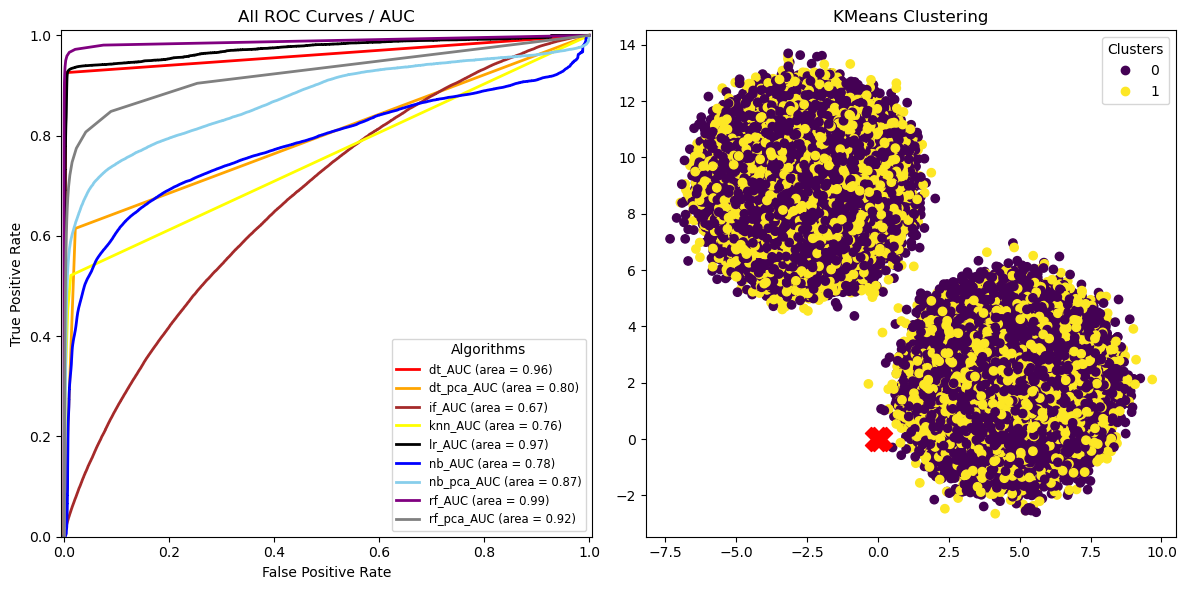

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

print("Algorithms:", algoNames)

# ROC Curves subplot
axes[0].set_title("All ROC Curves / AUC")
axes[0].set_xlim([-0.005, 1.005])
axes[0].set_ylim([0, 1.01])
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")

# Plot curves for each algorithm
axes[0].plot(dt_fpr, dt_tpr, color='red', lw=2, label='dt_AUC (area = %0.2f)' % dt_AUC)
axes[0].plot(dt_pca_fpr, dt_pca_tpr, color='orange', lw=2, label='dt_pca_AUC (area = %0.2f)' % dt_pca_AUC)
axes[0].plot(if_fpr, if_tpr, color='brown', lw=2, label='if_AUC (area = %0.2f)' % if_roc_auc)
axes[0].plot(knn_pca_fpr, knn_pca_tpr, color='yellow', lw=2, label='knn_AUC (area = %0.2f)' % knn_AUC)
axes[0].plot(lr_fpr, lr_tpr, color='black', lw=2, label='lr_AUC (area = %0.2f)' % lr_AUC)
axes[0].plot(nb_fpr, nb_tpr, color='blue', lw=2, label='nb_AUC (area = %0.2f)' % nb_AUC)
axes[0].plot(nb_pca_fpr, nb_pca_tpr, color='skyblue', lw=2, label='nb_pca_AUC (area = %0.2f)' % nb_pca_AUC)
axes[0].plot(rf_fpr, rf_tpr, color='purple', lw=2, label='rf_AUC (area = %0.2f)' % rf_AUC)
axes[0].plot(rf_pca_fpr, rf_pca_tpr, color='grey', lw=2, label='rf_pca_AUC (area = %0.2f)' % rf_pca_AUC)

# Add legend
axes[0].legend(loc='best', fontsize='small', title='Algorithms')

# KMeans clustering subplot
X, y = make_blobs(n_samples=len(X_train_balanced), centers=2, random_state=42)
scatter = axes[1].scatter(X[:, 0], X[:, 1], c=label_clustered, cmap='viridis', marker='o')
axes[1].scatter(ccfd_Kmeans.cluster_centers_[:, 0], ccfd_Kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
axes[1].set_title('KMeans Clustering')
axes[1].legend(*scatter.legend_elements(), title="Clusters")

plt.tight_layout()
plt.show()

# Graph of all the ROC Curves / PCA Roc Curves in Individual Plots (And AUC)

ROC (Receiver Operating Characteristic) Curves    (Red = Regular ROC/AUC,  Blue = w/ PCA applied) 

 Algorithms: ['Decision Tree', 'Isolation Forest', 'K-Means Clustering', 'KNN', 'Linear Regression', 'Logistic Regression', 'Naive Bayes', 'Random Forest']


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


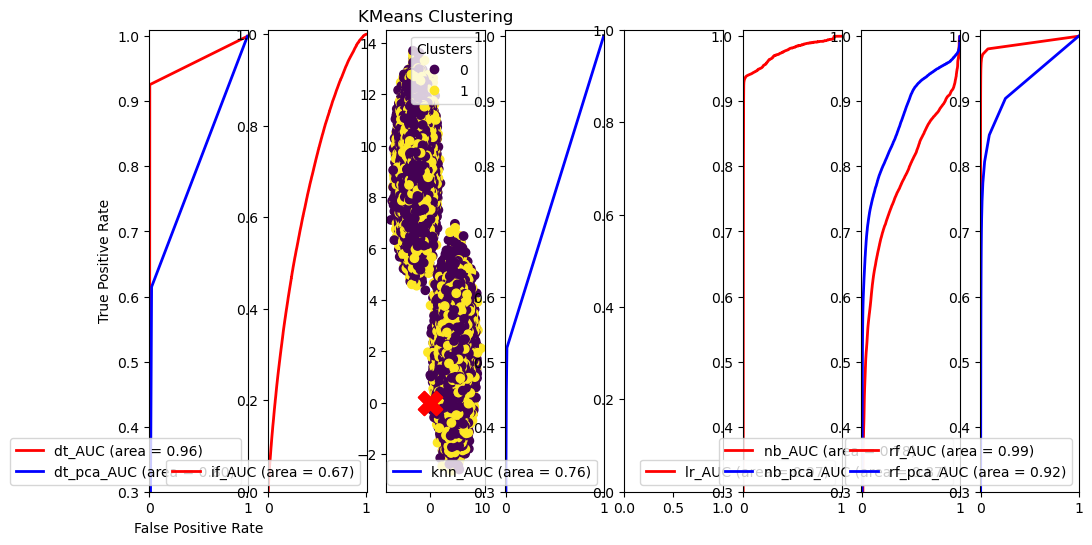

In [130]:
TYPES_OF_GRAPHS = 1 # 1 rows (1 for BOTH roc/auc & pca roc/pca auc)
fig, axes = plt.subplots(TYPES_OF_GRAPHS, len(algoNames), figsize=(12, 6))  # 8 rows x 2 columns

plotTitle = "ROC (Receiver Operating Characteristic) Curves    (Red = Regular ROC/AUC,  Blue = w/ PCA applied)"
print(plotTitle, "\n\n", "Algorithms:", algoNames)
# axes[0, 0].set_title(plotTitle) # topmost title

# decision tree
axes[0].plot(dt_fpr, dt_tpr, color='red', lw=2, label='dt_AUC (area = %0.2f)' % dt_AUC)
axes[0].set_xlim([-0.005, 1.005])
axes[0].set_ylim([0.3, 1.01])
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc='lower right');
# decision tree PCA
axes[0].plot(dt_pca_fpr, dt_pca_tpr, color='blue', lw=2, label='dt_pca_AUC (area = %0.2f)' % dt_pca_AUC)
axes[0].set_xlim([-0.005, 1.005])
axes[0].set_ylim([0.3, 1.01])
axes[0].legend(loc='lower right');

# isolation forest
axes[1].plot(if_fpr, if_tpr, color='red', lw=2, label='if_AUC (area = %0.2f)' % if_roc_auc)
axes[1].set_xlim([-0.005, 1.005])
axes[1].set_ylim([0.0, 1.01])
axes[1].legend(loc='lower right');

# k-means clustering
X, y = make_blobs(n_samples=len(X_train_balanced), centers=2, random_state=42) # sklearn.datasets
scatter = axes[2].scatter(X[:, 0], X[:, 1], c=label_clustered, cmap='viridis', marker='o')
axes[2].scatter(ccfd_Kmeans.cluster_centers_[:, 0], ccfd_Kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
axes[2].set_title('KMeans Clustering')
axes[2].legend(*scatter.legend_elements(), title="Clusters")  # Cluster color legend

# KNN - there is no [0, 3] since it doesn't work without PCA (too slow / doesn't finish / dataset too large)
axes[3].plot(knn_pca_fpr, knn_pca_tpr, color='blue', lw=2, label='knn_AUC (area = %0.2f)' % knn_AUC)
axes[3].set_xlim([-0.005, 1.005])
axes[3].set_ylim([0.3, 1.01])
axes[3].legend(loc='lower right');

# Linear Regression
# [0 4] - ROC not used for continuous only classification
# [1, 4] - ROC not used for continuous only classification

# Logistic Regression
axes[5].plot(lr_fpr, lr_tpr, color='red', lw=2, label='lr_AUC (area = %0.2f)' % lr_AUC)
axes[5].set_xlim([-0.005, 1.005])
axes[5].set_ylim([0.3, 1.01])
axes[5].legend(loc='lower right');

# Naive Bayes
axes[6].plot(nb_fpr, nb_tpr, color='red', lw=2, label='nb_AUC (area = %0.2f)' % nb_AUC)
axes[6].set_xlim([-0.005, 1.005])
axes[6].set_ylim([0.3, 1.01])
axes[6].legend(loc='lower right');
# Naive Bayes PCA
axes[6].plot(nb_pca_fpr, nb_pca_tpr, color='blue', lw=2, label='nb_pca_AUC (area = %0.2f)' % nb_pca_AUC)
axes[6].set_xlim([-0.005, 1.005])
axes[6].set_ylim([0.3, 1.01])
axes[6].legend(loc='lower right');

# Random Forest
axes[7].plot(rf_fpr, rf_tpr, color='red', lw=2, label='rf_AUC (area = %0.2f)' % rf_AUC)
axes[7].set_xlim([-0.005, 1.005])
axes[7].set_ylim([0.3, 1.01])
axes[7].legend(loc='lower right');
# Random Forest PCA
axes[7].plot(rf_pca_fpr, rf_pca_tpr, color='blue', lw=2, label='rf_pca_AUC (area = %0.2f)' % rf_pca_AUC)
axes[7].set_xlim([-0.005, 1.005])
axes[7].set_ylim([0.3, 1.01])
axes[7].legend(loc='lower right');